In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

# Data preprocessing

In [3]:
data = pd.read_excel("C:/Users/amoge/Downloads/Soil_dataset.xlsx")
print(data.to_string())

      Latitude  Longitude  Cd (mg/kg)  Cr (mg/kg)  Ni (mg/kg)  Pb (mg/kg)  Zn (mg/kg)  Cu (mg/kg)  Co (mg/kg)
0     -25.6500    25.8667       0.022       0.038       0.594      14.064       0.990       9.930      23.480
1     -25.5333    29.8667       0.014       0.069       0.164       3.261       0.560       5.440      18.380
2     -25.5000    29.8667       0.002       0.045       0.110       1.659       0.260       1.640       1.090
3     -25.7720    30.0731       0.006       0.000       0.072       6.337       0.230       4.490       3.800
4     -25.6843    30.0521       0.004       0.093       0.143       3.971       0.450       2.770       1.390
5     -25.5733    30.1193       0.008       0.267       0.418       2.008       4.450       1.430       0.141
6     -25.2554    30.1560       0.036       0.240       0.351       2.232       0.642       1.748       0.649
7     -25.2293    30.0621       0.004       0.149       0.230       1.490       0.250       1.370       0.329
8     -25.

In [4]:
def determine_contamination_degree(dataset):
    fCd = []
    fCr = []
    fNi = []
    fPb = []
    fZn = []
    fCu = []
    fCo = []
    fDeg = []
    fDeg_class = []

    for i in dataset:
        #print(dataset[i])
        for x in dataset[i]:
            #print(x)
            if i == 'Cd (mg/kg)':
                f_value = x/7.5
                #print(f_value)
                fCd.append(f_value)

            elif i == 'Cr (mg/kg)':
                f_value = x/6.5
                fCr.append(f_value)

            elif i == 'Ni (mg/kg)':
                f_value = x/91
                fNi.append(f_value)

            elif i == 'Pb (mg/kg)':
                f_value = x/20
                fPb.append(f_value)

            elif i == 'Zn (mg/kg)':
                f_value = x/240
                fZn.append(f_value)

            elif i == 'Cu (mg/kg)':
                f_value = x/16
                fCu.append(f_value)

            elif i == 'Co (mg/kg)':
                f_value = x/300
                fCo.append(f_value)

    #print(fCd)
    dataset['fCd'] = pd.Series(fCd)
    dataset['fCr'] = pd.Series(fCr)
    dataset['fNi'] = pd.Series(fNi)
    dataset['fPb'] = pd.Series(fPb)
    dataset['fZn'] = pd.Series(fZn)
    dataset['fCu'] = pd.Series(fCu)
    dataset['fCo'] = pd.Series(fCo)


   # dataset.loc[2]
    #len(dataset)
    factors = dataset.iloc[:, 9:]
    #int(factors)

    for r in range(len(factors)):
        value = factors.loc[r].values
        f_value = sum(value)/7
       #print(f_value)
        fDeg.append(f_value)
        #rint(value)
    dataset['fDeg'] = pd.Series(fDeg)
    
    for f in dataset['fDeg']:
        if f < 1.5:
            f_class = 'very low contamination'
            
        elif 1.5 < f and f <= 2:
            f_class = 'low contamination'
            
        elif 2 < f and f <= 4:
            f_class = 'moderate contamination'
            
        elif 4 < f and f <= 8:
            f_class = 'high contamination'
        
        elif 8 < f and f <= 16:
            f_class = 'very high contamination'
        
        elif 16 < f and f <= 32:
            f_class = 'extremely high contamination'
            
        elif f > 32:
            f_class = 'ultra-high contamination'
            
        fDeg_class.append(f_class)
    dataset['fDeg_class'] = pd.Series(fDeg_class)
    
    return dataset

In [5]:
determine_contamination_degree(data)

,Latitude,Longitude,Cd (mg/kg),Cr (mg/kg),Ni (mg/kg),Pb (mg/kg),Zn (mg/kg),Cu (mg/kg),Co (mg/kg),fCd,fCr,fNi,fPb,fZn,fCu,fCo,fDeg,fDeg_class
0,-25.6500,25.8667,0.022,0.038,0.594,14.064,0.99,9.93,23.48,0.002933,0.005846,0.006527,0.70320,0.004125,0.620625,0.078267,0.203075,very low contamination
1,-25.5333,29.8667,0.014,0.069,0.164,3.261,0.56,5.44,18.38,0.001867,0.010615,0.001802,0.16305,0.002333,0.340000,0.061267,0.082991,very low contamination
2,-25.5000,29.8667,0.002,0.045,0.110,1.659,0.26,1.64,1.09,0.000267,0.006923,0.001209,0.08295,0.001083,0.102500,0.003633,0.028366,very low contamination
3,-25.7720,30.0731,0.006,0.000,0.072,6.337,0.23,4.49,3.80,0.000800,0.000000,0.000791,0.31685,0.000958,0.280625,0.012667,0.087527,very low contamination
4,-25.6843,30.0521,0.004,0.093,0.143,3.971,0.45,2.77,1.39,0.000533,0.014308,0.001571,0.19855,0.001875,0.173125,0.004633,0.056371,very low contamination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,-26.1489,26.1756,0.050,107.400,82.190,6.030,0.00,15.60,0.00,0.006667,16.523077,0.903187,0.30150,0.000000,0.975000,0.000000,2.672776,moderate contamination
5772,-27.1717,26.6638,0.044,431.820,383.180,7.980,0.00,23.44,0.00,0.005867,66.433846,4.210769,0.39900,0.000000,1.465000,0.000000,10.359212,very high contamination
5773,-27.3187,25.5017,0.047,388.700,140.070,4.290,0.00,21.78,0.00,0.006267,59.800000,1.539231,0.21450,0.000000,1.361250,0.000000,8.988750,very high contamination
5774,-26.8501,25.0803,0.088,376.970,630.460,8.760,0.00,38.93,0.00,0.011733,57.995385,6.928132,0.43800,0.000000,2.433125,0.000000,9.686625,very high contamination


In [6]:
print(data['fDeg_class'].to_string())

0             very low contamination
1             very low contamination
2             very low contamination
3             very low contamination
4             very low contamination
5             very low contamination
6             very low contamination
7             very low contamination
8             very low contamination
9             very low contamination
10            very low contamination
11            very low contamination
12            very low contamination
13            very low contamination
14            very low contamination
15            very low contamination
16            very low contamination
17            very low contamination
18            very low contamination
19            very low contamination
20            very low contamination
21            very low contamination
22            very low contamination
23            very low contamination
24            very low contamination
25            very low contamination
26            very low contamination
2

# Define features and labels, train_test split

In [23]:
X = data.iloc[:, 2:9].values
y = data.iloc[:, -1].values
z = data.iloc[:, -2].values

print(X)
type(X)

[[2.2000e-02 3.8000e-02 5.9400e-01 ... 9.9000e-01 9.9300e+00 2.3480e+01]
 [1.4000e-02 6.9000e-02 1.6400e-01 ... 5.6000e-01 5.4400e+00 1.8380e+01]
 [2.0000e-03 4.5000e-02 1.1000e-01 ... 2.6000e-01 1.6400e+00 1.0900e+00]
 ...
 [4.7000e-02 3.8870e+02 1.4007e+02 ... 0.0000e+00 2.1780e+01 0.0000e+00]
 [8.8000e-02 3.7697e+02 6.3046e+02 ... 0.0000e+00 3.8930e+01 0.0000e+00]
 [4.4000e-02 3.7861e+02 1.3588e+02 ... 0.0000e+00 2.0180e+01 0.0000e+00]]


numpy.ndarray

# Classification model

###  Encode y labels

In [8]:
class_encoder = LabelEncoder()
encoded_y = class_encoder.fit_transform(y)
encoded_y

array([6, 6, 6, ..., 5, 5, 5])

### Train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.2, random_state = 0)

y_train

array([6, 6, 6, ..., 6, 6, 6])

### Building the ANN

In [10]:
ann_model = tf.keras.models.Sequential()

In [11]:
def create_model():
    ann_model.add(tf.keras.layers.Dense(units=10, activation='relu'))
    ann_model.add(tf.keras.layers.Dropout(rate=0.2))
    ann_model.add(tf.keras.layers.Dense(units=10, activation='relu'))
    ann_model.add(tf.keras.layers.Dropout(rate=0.2))
    ann_model.add(tf.keras.layers.Dense(units=7, activation='softmax'))
    
    ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
    return ann_model

def train_model(model, train_features, train_label):
    history = model.fit(train_features, train_label, epochs=50, batch_size = 16, validation_split=0.1)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

In [12]:
def plot_curve(epochs, hist):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    error = hist.loss.values
    val_error = hist.val_loss.values
    
    plt.plot(epochs, error, label='loss')
    plt.plot(epochs, val_error, label = 'val_loss')
    
    
    plt.legend(loc='upper right', labels=['loss', 'val_loss'])

### Train the model

Epoch 1/50
260/260 [==============================] - 3s 5ms/step - loss: 3.8320 - accuracy: 0.6000 - val_loss: 1.1438 - val_accuracy: 0.8745
Epoch 2/50
260/260 [==============================] - 1s 4ms/step - loss: 1.6394 - accuracy: 0.8519 - val_loss: 0.7225 - val_accuracy: 0.8983
Epoch 3/50
260/260 [==============================] - 1s 2ms/step - loss: 1.1323 - accuracy: 0.8754 - val_loss: 0.5551 - val_accuracy: 0.8918
Epoch 4/50
260/260 [==============================] - 1s 3ms/step - loss: 0.8696 - accuracy: 0.8836 - val_loss: 0.4392 - val_accuracy: 0.8918
Epoch 5/50
260/260 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.8853 - val_loss: 0.3895 - val_accuracy: 0.8918
Epoch 6/50
260/260 [==============================] - 1s 4ms/step - loss: 0.5110 - accuracy: 0.8901 - val_loss: 0.3545 - val_accuracy: 0.8896
Epoch 7/50
260/260 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8882 - val_loss: 0.3352 - val_accuracy: 0.8918
Epoch 

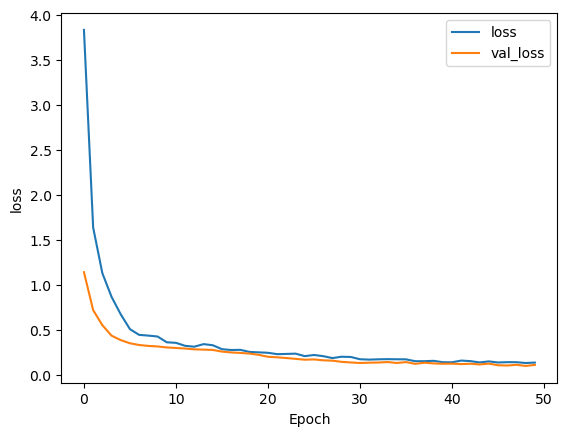

In [13]:
my_model = create_model()
epochs, hist = train_model(ann_model, X_train, y_train)
plot_curve(epochs, hist)

### Make predictions on test set

In [14]:
def make_predictions(X_set):
    y_predicted = ann_model.predict(X_set)
    y_predicted_classes = np.argmax(y_predicted, axis=1)
    decoded_predicted_classes = class_encoder.inverse_transform(y_predicted_classes)
    return decoded_predicted_classes, y_predicted, y_predicted_classes

37/37 [==============================] - 0s 2ms/step
[6 6 6 ... 6 6 6]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.06      0.09        18
           2       0.68      0.46      0.55        46
           3       0.69      0.82      0.75        49
           5       0.00      0.00      0.00         5
           6       0.98      1.00      0.99      1037

    accuracy                           0.95      1156
   macro avg       0.42      0.39      0.39      1156
weighted avg       0.94      0.95      0.94      1156

---------------------------------------------
[[   0    0    0    0    1    0]
 [   0    1    0   17    0    0]
 [   0    0   21    0    0   25]
 [   0    0    9   40    0    0]
 [   0    4    0    1    0    0]
 [   0    0    1    0    0 1036]]


c:\Users\amoge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amoge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amoge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'ylabel')

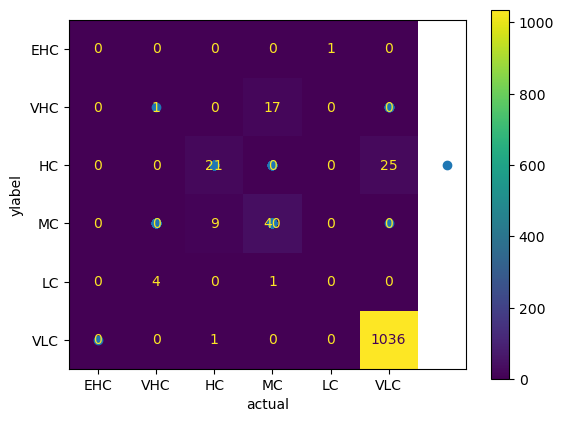

In [25]:
decoded_predicted_classes, y_predicted, y_predicted_classes= make_predictions(X_test)
accuracy = accuracy_score(y_test, y_predicted_classes)
report = classification_report(y_test, y_predicted_classes)
confusion = metrics.confusion_matrix(y_test, y_predicted_classes)
print(y_predicted_classes)
print('---------------------------------------------')
print(report)
print('---------------------------------------------')
print(confusion)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['EHC', 'VHC', 'HC', 'MC', 'LC','VLC',])
cm_display.plot()
plt.scatter(y_test, y_predicted_classes)
plt.xlabel('actual')
plt.ylabel('ylabel')

### Save the model

In [16]:
ann_model.save("ann-c_model.h5")

c:\Users\amoge\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Regression model

### Train/test split

In [17]:
Xr_train, Xr_test, z_train, z_test = train_test_split(X, z, test_size = 0.2, random_state = 0)

z_test

array([0.49567385, 0.05989648, 0.03349648, ..., 0.0164562 , 0.01589167,
       1.2825831 ])

### Build the ANN

In [18]:
reg_model = tf.keras.models.Sequential()

In [19]:
def create_reg_model():
    reg_model.add(tf.keras.layers.Dense(units=10, activation='relu'))
    reg_model.add(tf.keras.layers.Dropout(rate=0.2))
    reg_model.add(tf.keras.layers.Dense(units=10, activation='relu'))
    reg_model.add(tf.keras.layers.Dropout(rate=0.2))
    reg_model.add(tf.keras.layers.Dense(units=1))
    
    reg_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
  
    return reg_model

def train_reg_model(model, train_features, train_label):
    history = model.fit(train_features, train_label, epochs=50, batch_size = 16, shuffle=True, validation_split=0.1)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

def plot_reg_curve(epochs, hist):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    error = hist.loss.values
    val_error = hist.val_loss.values
    
    plt.plot(epochs, error, label='loss')
    plt.plot(epochs, val_error, label = 'val_loss')
    
    
    plt.legend(loc='upper right', labels=['loss', 'val_loss'])

Epoch 1/50


260/260 [==============================] - 4s 10ms/step - loss: 275.2484 - mae: 4.2408 - val_loss: 15.1169 - val_mae: 1.4919
Epoch 2/50
260/260 [==============================] - 2s 7ms/step - loss: 128.5025 - mae: 2.5218 - val_loss: 4.8407 - val_mae: 0.9189
Epoch 3/50
260/260 [==============================] - 1s 5ms/step - loss: 83.7884 - mae: 1.9219 - val_loss: 2.2939 - val_mae: 0.5998
Epoch 4/50
260/260 [==============================] - 2s 6ms/step - loss: 54.7640 - mae: 1.5584 - val_loss: 1.5789 - val_mae: 0.4801
Epoch 5/50
260/260 [==============================] - 1s 4ms/step - loss: 56.9117 - mae: 1.1781 - val_loss: 1.8164 - val_mae: 0.5207
Epoch 6/50
260/260 [==============================] - 1s 4ms/step - loss: 16.9105 - mae: 0.8499 - val_loss: 0.8873 - val_mae: 0.4127
Epoch 7/50
260/260 [==============================] - 1s 5ms/step - loss: 10.6029 - mae: 0.6909 - val_loss: 0.8631 - val_mae: 0.4294
Epoch 8/50
260/260 [==============================] - 1s 5ms/step - loss: 5.

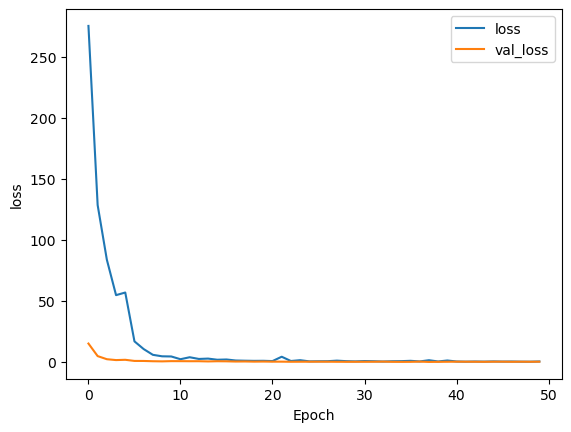

In [20]:
create_reg_model()
r_epochs, r_hist= train_reg_model(reg_model, Xr_train, z_train)
plot_reg_curve(r_epochs,r_hist)

### Make predictions

37/37 [==============================] - 0s 1ms/step
0.8493061782745897


Text(0, 0.5, 'ylabel')

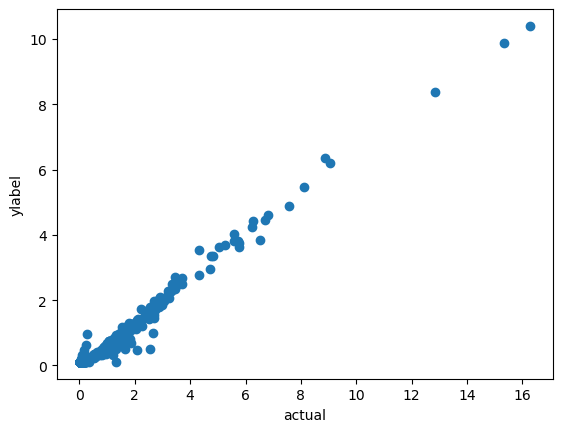

In [21]:
predictions = reg_model.predict(Xr_test).flatten()
plt.scatter(z_test, predictions)
accuracy_reg = r2_score(z_test, predictions)

print(accuracy_reg)
plt.xlabel('actual')
plt.ylabel('ylabel')


### Save the model

In [22]:
reg_model.save("ann-r_model.h5")

c:\Users\amoge\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
